# H1B Visa Exploratory Data Analysis

by Vitor Viana

H-1B visa is a type of visa in the U.S. that allow for employers to temporalily employ foreign workers in specialty occupations. A specialty occupation requires the application of specialized knowledge and a bachelor's degree or the equivalent work experience. H-1B visas are highly sought after by immigrant workers and international students in the U.S. because it allows for the opportunity to stay and work in the U.S.. For this reason, receiving a H-1B visa is a difficult process and extremely competitive because of caps that the government impose on the amount of H-1B visas issued each fiscal year.

In the following analysis, we will explore data on H-1B visas between the years of 2011 to 2019. Two datasets were retrieved from kaggle and then combined to allow us a better analysis. 


## 1 - Cleaning the data

In this first part, we need to load both datasests into dataframes. We need to operate on both dataframes so that they are useful and can be combined, which will then enable us to move foward with the analysis.

In [22]:
#Import the initial libraries
import numpy as np
import pandas as pd

In [23]:
#Read both CSV files from the current directory in my computer into two dataframes
h1b_2011_2016 = pd.read_csv('h1b_kaggle.csv', index_col=[0])
h1b_2015_2019 = pd.read_csv('h1b_disclosure_data_2015_2019.csv', encoding='UTF-8')

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [24]:
#Clean the first dataframe

h1b_2011_2016.drop(columns = ['lon', 'lat'], inplace = True) #Drop unecessary columns 
h1b_2011_2016.dropna(thresh = 5, inplace = True) #Drop NaN values

#Delete the years 2015 and 2016 since they are also on the other dataset and we don't want them to overlap
h1b_2011_2016 = h1b_2011_2016[(h1b_2011_2016['YEAR'] != 2016) & (h1b_2011_2016['YEAR'] != 2015)] 

#Split the WORKSITE column into city and state to match the second dataset and make our analysis easier
new_columns = h1b_2011_2016['WORKSITE'].str.split(",", n=1, expand= True)
h1b_2011_2016['WORKSITE_CITY'] = new_columns[0]
h1b_2011_2016['WORKSITE_STATE_FULL'] = new_columns[1]

h1b_2011_2016.head() #Take a look at the first dataframe

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,WORKSITE_CITY,WORKSITE_STATE_FULL
1266531,CERTIFIED-WITHDRAWN,TEXAS STATE UNIVERSITY-SAN MARCOS,"Biological Scientists, All Other",POSTDOCTORAL RESEARCH ASSOCIATE,Y,43118.0,2014.0,"SAN MARCOS, TEXAS",SAN MARCOS,TEXAS
1266532,CERTIFIED,"EYE SPECIALISTS OF INDIANA, P.C.",Optometrists,OPTOMETRIST,Y,64251.0,2014.0,"INDIANAPOLIS, INDIANA",INDIANAPOLIS,INDIANA
1266533,DENIED,"LHB, INC.",Actors,FOOD SAFETY SCIENTIST,Y,50000.0,2014.0,"FARG, WISCONSIN",FARG,WISCONSIN
1266534,CERTIFIED,"WAM USA, INC.",Accountants and Auditors,INTERNATIONAL ACCOUNTANT,Y,47424.0,2014.0,"LAWRENCEVILLE, GEORGIA",LAWRENCEVILLE,GEORGIA
1266535,CERTIFIED-WITHDRAWN,"DFUSE TECHNOLOGIES, INC.",Computer Programmers,PROGRAMMER ANALYST,Y,61589.0,2014.0,"SAN JOSE, CALIFORNIA",SAN JOSE,CALIFORNIA


In [25]:
#Clean the second dataframe

#Drop unecessary columns that are not present in the first dataset
h1b_2015_2019.drop(columns = ['CASE_NUMBER', 'SOC_CODE', 'WORKSITE_STATE_ABB'], inplace = True )

h1b_2015_2019.head() #Take a look at the second dataframe

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,WORKSITE_CITY,YEAR,WORKSITE_STATE_FULL,WORKSITE
0,CERTIFIED,IT CATS LLC,COMPUTER SYSTEMS ANALYSTS,SENIOR BUSINESS ANALYST,Y,109116.8,"NORTH WALES,",2015,PENNSYLVANIA,"NORTH WALES, PENNSYLVANIA"
1,CERTIFIED-WITHDRAWN,"XPERT TECHNOLOGIES, INC.","COMPUTER OCCUPATIONS, ALL OTHER*",QUALITY ASSURANCE ANALYST,Y,58282.0,CAMP HILL,2015,PENNSYLVANIA,"CAMP HILL, PENNSYLVANIA"
2,CERTIFIED,"ISR INFO WAY, INC.","SOFTWARE DEVELOPERS, APPLICATIONS",SR. SOFTWARE DEVELOPER,Y,84906.0,CHICAGO,2015,ILLINOIS,"CHICAGO, ILLINOIS"
3,CERTIFIED,MAGIC CIRCLE FILMS INTERNATIONAL LLC,FILM AND VIDEO EDITORS,VIDEO EDITOR,Y,39333.0,AUBURN,2015,NEW YORK,"AUBURN, NEW YORK"
4,WITHDRAWN,SAPHIRE SOLUTIONS INC,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,SYSTEMS ADMINISTRATOR,Y,68638.0,BETHPAGE,2015,NEW YORK,"BETHPAGE, NEW YORK"


In [26]:
#Combine both datasets into a dataframe called h1b
h1b = pd.concat([h1b_2011_2016, h1b_2015_2019], ignore_index=True, sort=False)
h1b.sort_values('YEAR', ascending=True, inplace=True) #Sort values by year 
h1b.reset_index(inplace=True, drop=True) #Reset the index 

#Get rid of outlier case stauses
cases = ['CERTIFIED', 'WITHDRAWN', 'CERTIFIED-WITHDRAWN', 'DENIED']
h1b = h1b[h1b['CASE_STATUS'].isin(cases)]

#Drop the SOC_NAME column 
h1b.drop('SOC_NAME', 1, inplace= True)
h1b.dropna(inplace = True) #Drop NaN values

h1b.head() #Take a look at the new dataframe

,CASE_STATUS,EMPLOYER_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,WORKSITE_CITY,WORKSITE_STATE_FULL
0,CERTIFIED,UNIVERSITY OF ILLINOIS AT CHICAGO,VISITING COMMUNICATIONS SPECIALIST,Y,32469.0,2011.0,"CHICAGO, ILLINOIS",CHICAGO,ILLINOIS
1,CERTIFIED,APPLE INC.,WW SUPPLY DEMAND PLANNER,Y,73965.0,2011.0,"CUPERTINO, CALIFORNIA",CUPERTINO,CALIFORNIA
2,CERTIFIED,QUALCOMM INCORPORATED,STAFF SOFTWARE ENGINEER,Y,95597.0,2011.0,"SAN DIEGO, CALIFORNIA",SAN DIEGO,CALIFORNIA
3,CERTIFIED,"HILLCREST EDUCATIONAL CENTERS, INC.",CASE SPECIALIST,Y,22568.0,2011.0,"PITTSFIELD, MASSACHUSETTS",PITTSFIELD,MASSACHUSETTS
4,CERTIFIED,"BURGESS & NIPLE, INC.",ARCHITECTURAL DESIGNER,Y,33010.0,2011.0,"CINCINNATI, OHIO",CINCINNATI,OHIO


In [27]:
print('H1B Applications Analyzed:', h1b.shape[0])

H1B Applications Analyzed: 2592960


## 2 - Exploratory Data Analysis

Now with the final h1b dataframe we can begin our exploration

In [89]:
#Import libraries for data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### What are the differences between case status?

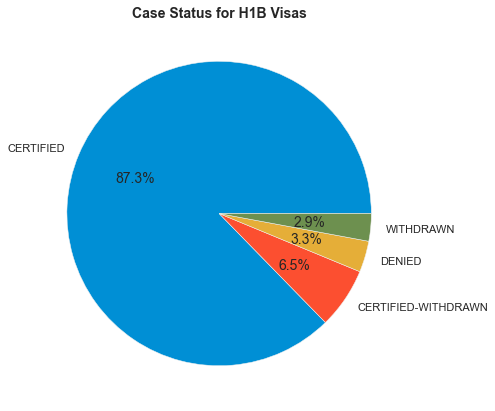

In [29]:
plt.figure(figsize=(10,7))
case_status = h1b['CASE_STATUS'].value_counts()
with plt.style.context('fivethirtyeight'):
    plt.pie(case_status, labels = case_status.index, autopct='%1.1f%%')
    plt.title('Case Status for H1B Visas', fontsize=14, fontweight = 'heavy')

In [30]:
h1b['CASE_STATUS'].value_counts()

CERTIFIED              2263764
CERTIFIED-WITHDRAWN     167541
DENIED                   85953
WITHDRAWN                75702
Name: CASE_STATUS, dtype: int64

#### Which states have the most H-1B applications?

In [31]:
#Before we analyze cases by state, we need to make sure that each string have no leading and trailing spaces
h1b['WORKSITE_STATE_FULL'] = h1b.loc[:, ['WORKSITE_STATE_FULL']].WORKSITE_STATE_FULL.str.strip()

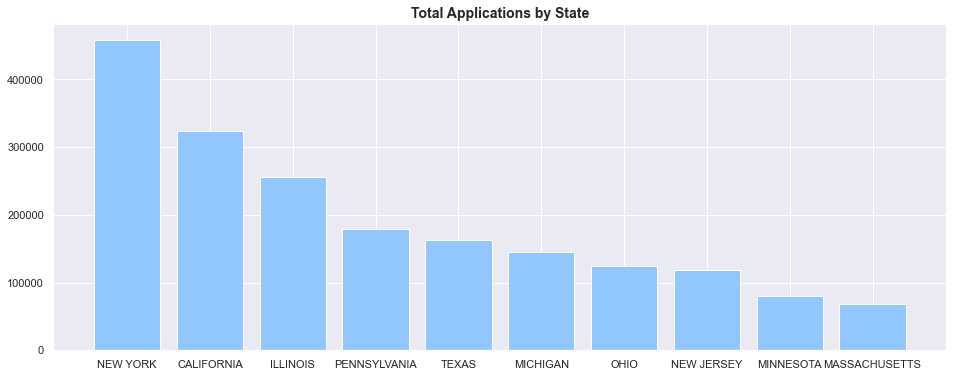

In [35]:
#Top 10 states with most applications

plt.figure(figsize=(16,6))
state_count = h1b['WORKSITE_STATE_FULL'].value_counts().head(10)
with plt.style.context('seaborn-pastel'):
    plt.bar(state_count.index, state_count)
    plt.title('Total Applications by State', fontsize=14, fontweight='heavy')

From this visualisation we are able to notice that New York and California are the two states with the most H1B applications, according to our dataset. This could suggest that most high skilled foreign workers are living in these states, and that this is where most high skilled jobs are located.

#### Which companies file the most H-1B petitions?

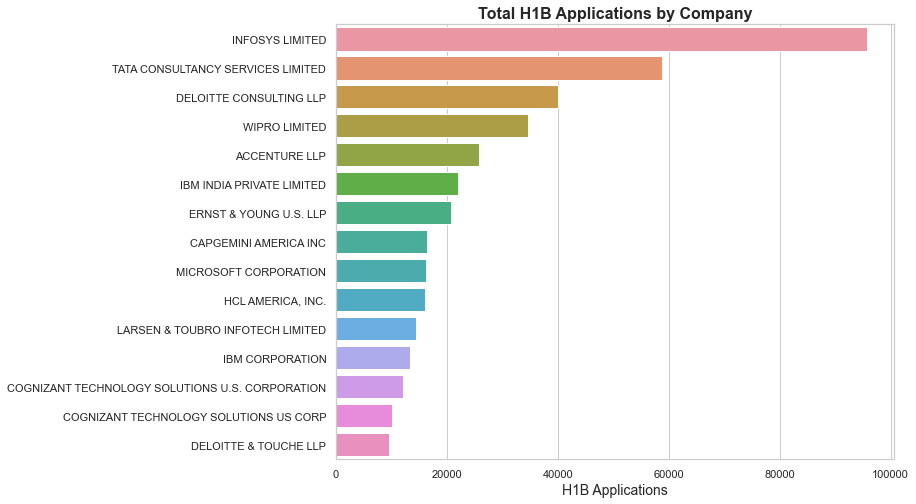

In [38]:
#Top companies 
top_employers = h1b['EMPLOYER_NAME'].value_counts()[:15]

plt.figure(figsize=(10,8))
with sns.axes_style('whitegrid'):
    sns.barplot(x = top_employers, y = top_employers.index)
    plt.title('Total H1B Applications by Company', fontsize=16, fontweight='heavy')
    plt.xlabel('H1B Applications', fontsize=14)

#### Which job titles have the most applications?

Text(0, 0.5, 'Total H1B Applications')

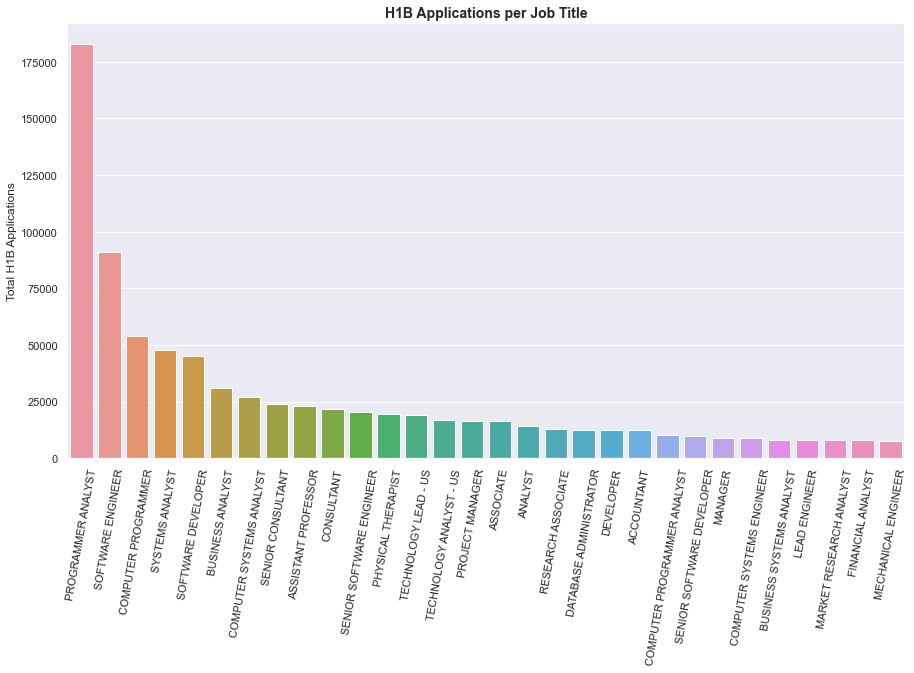

In [39]:
# Top jobs 
plt.figure(figsize=(15,8))
plt.xticks(rotation=80)
top_jobs = h1b['JOB_TITLE'].value_counts()[:30]
ax = sns.barplot(top_jobs.index, top_jobs)
plt.title('H1B Applications per Job Title', fontsize=14, fontweight='heavy')
ax.set_ylabel('Total H1B Applications')

The top H1B petitions are for job titles related to computer programming and software development

#### Distribution of wages 

Text(0.5, 0, 'Wage')

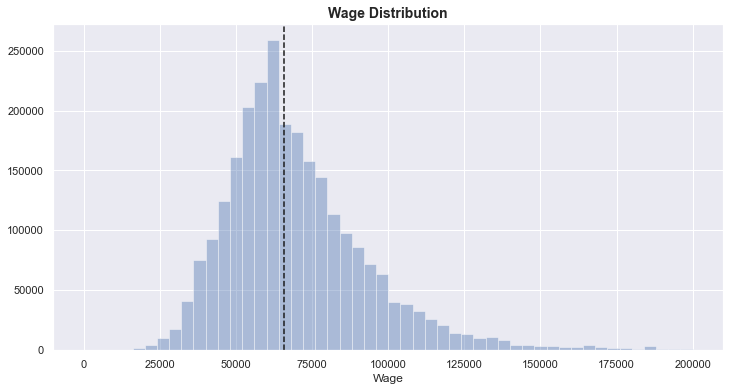

In [40]:
#Wages
plt.figure(figsize=(12,6))
wages = h1b[h1b['PREVAILING_WAGE'] <= 200000].PREVAILING_WAGE
sns.distplot(wages, kde=False)
plt.axvline(wages.median(), color = 'k', linestyle='--')
plt.title('Wage Distribution', fontsize=14, fontweight='heavy')
plt.xlabel('Wage')

The median salary for H1B applicants is $65,666

#### Data jobs

In [46]:
data_scientist = h1b[h1b['JOB_TITLE'].str.contains('DATA SCIENTIST')]
data_analyst = h1b[h1b['JOB_TITLE'].str.contains('DATA ANALYST')]
data_engineer = h1b[h1b['JOB_TITLE'].str.contains('DATA ENGINEER')]

Text(0.5, 1.0, 'Data Engineering')

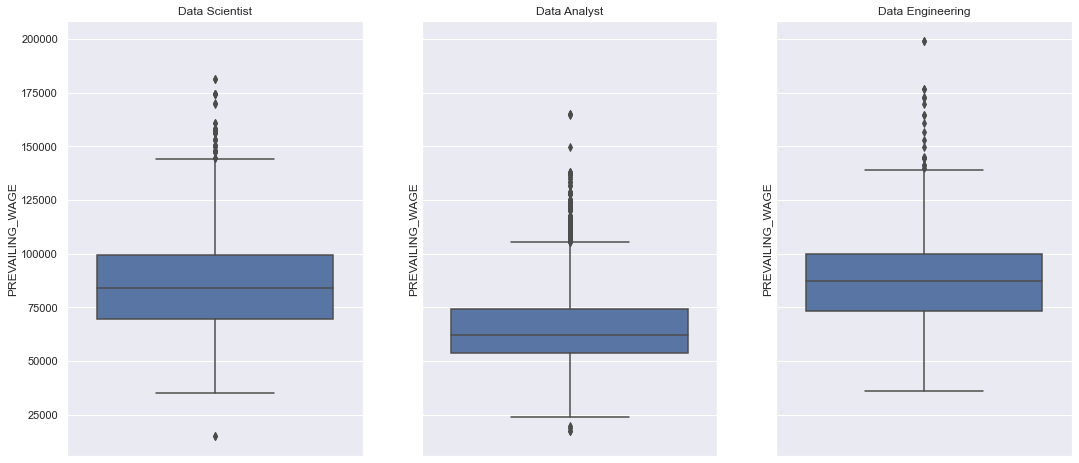

In [91]:
#Wages for data jobs
f, ax = plt.subplots(1, 3, sharex = True, figsize = (18, 8), sharey=True)
sns.boxplot(ax = ax[0], y = data_scientist.loc[
    data_scientist.PREVAILING_WAGE <= 200000, ['PREVAILING_WAGE']].PREVAILING_WAGE)
ax[0].set_title('Data Scientist')
sns.boxplot(ax = ax[1], y = data_analyst.loc[
    data_analyst.PREVAILING_WAGE <= 200000, ['PREVAILING_WAGE']].PREVAILING_WAGE)
ax[1].set_title('Data Analyst')
sns.boxplot(ax = ax[2], y = data_engineer.loc[
    data_engineer.PREVAILING_WAGE <= 200000, ['PREVAILING_WAGE']].PREVAILING_WAGE)
ax[2].set_title('Data Engineering')

Data science and data engineering positions have a similar median wages, while the median wage for data analysts is lower. This makes sense considering that data analyst are usually entry level positions.

Text(0.5, 0, 'Count')

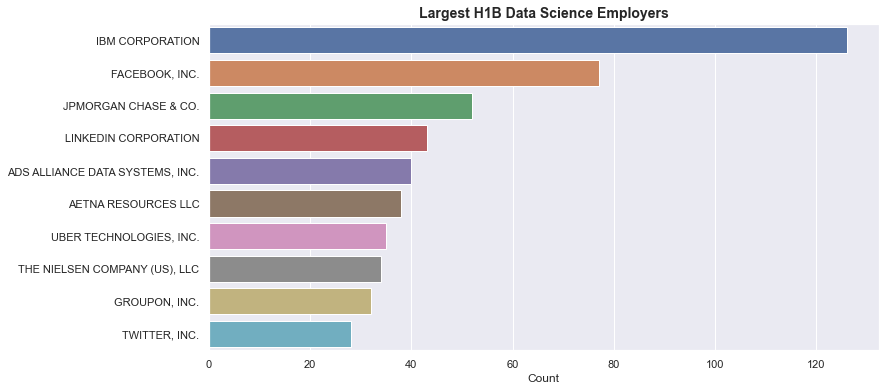

In [110]:
#Largest employers for data science
comp_count = data_scientist['EMPLOYER_NAME'].value_counts()[:10]
plt.figure(figsize=(12, 6))
sns.barplot(comp_count, comp_count.index)
plt.title('Largest H1B Data Science Employers', fontsize=14, fontweight='heavy')
plt.xlabel('Count')

In this dataset, IBM has made the most H1B petitions for data science positions